#Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


#Load Datasets



In [2]:
# Load NASA Turbofan Datasets
df_nasa_train = pd.read_csv('train_FD001.txt', delim_whitespace=True, header=None)
df_nasa_test = pd.read_csv('test_FD001.txt', delim_whitespace=True, header=None)
df_rul = pd.read_csv('RUL_FD001.txt', header=None, names=['RUL'])


#Explore the Datasets



In [3]:
# NASA Turbofan Training Dataset
print("\nNASA Turbofan Training Dataset Shape:", df_nasa_train.shape)
print(df_nasa_train.head())

# NASA RUL Dataset
print("\nNASA RUL Dataset Shape:", df_rul.shape)
print(df_rul.head())



NASA Turbofan Training Dataset Shape: (20631, 26)
   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

        25  
0  23.4190  
1  23.423

#Assign Column Names

In [4]:
# For NASA Turbofan Dataset
columns_nasa = ['unit_number', 'time_in_cycles'] + \
               ['op_setting_1', 'op_setting_2', 'op_setting_3'] + \
               ['sensor_measurement_' + str(i) for i in range(1, 22)]
df_nasa_train.columns = columns_nasa
df_nasa_test.columns = columns_nasa

# Display the updated head of the NASA training dataset
print("Updated NASA Turbofan Training Dataset Columns:")
print(df_nasa_train.head())

Updated NASA Turbofan Training Dataset Columns:
   unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0            1               1       -0.0007       -0.0004         100.0   
1            1               2        0.0019       -0.0003         100.0   
2            1               3       -0.0043        0.0003         100.0   
3            1               4        0.0007        0.0000         100.0   
4            1               5       -0.0019       -0.0002         100.0   

   sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  \
0                518.67                641.82               1589.70   
1                518.67                642.15               1591.82   
2                518.67                642.35               1587.99   
3                518.67                642.35               1582.79   
4                518.67                642.37               1582.85   

   sensor_measurement_4  sensor_measurement_5  ...  sensor_measureme

#Data Harmonization



In [5]:
# For NASA Turbofan Dataset

# The 'time_in_cycles' column represents operational cycles, which is a numerical sequence.
# No need to convert it to datetime. However, if we want to create a consistent time index, we can.

# For demonstration, we'll create a 'timestamp' column assuming each cycle represents a fixed time interval.

# Let's assume each cycle is 1 hour apart (adjust as necessary based on domain knowledge)
df_nasa_train['timestamp'] = pd.to_timedelta(df_nasa_train['time_in_cycles'], unit='h')
df_nasa_test['timestamp'] = pd.to_timedelta(df_nasa_test['time_in_cycles'], unit='h')

# Display the updated datasets
print("\nNASA Turbofan Training Dataset with Timestamp:")
print(df_nasa_train[['unit_number', 'time_in_cycles', 'timestamp']].head())



NASA Turbofan Training Dataset with Timestamp:
   unit_number  time_in_cycles       timestamp
0            1               1 0 days 01:00:00
1            1               2 0 days 02:00:00
2            1               3 0 days 03:00:00
3            1               4 0 days 04:00:00
4            1               5 0 days 05:00:00


#Data Cleaning



In [6]:
# For NASA Turbofan Dataset

# Check for missing values in training data
missing_values_nasa_train = df_nasa_train.isnull().sum()
print("\nMissing values in NASA Turbofan Training Dataset:\n", missing_values_nasa_train)

# Check for missing values in test data
missing_values_nasa_test = df_nasa_test.isnull().sum()
print("\nMissing values in NASA Turbofan Test Dataset:\n", missing_values_nasa_test)

# Assuming there are no missing values, but if there were, we could handle them similarly
# For demonstration, we'll proceed assuming the datasets are complete

# Optionally, reset indices after cleaning
df_nasa_train.reset_index(drop=True, inplace=True)
df_nasa_test.reset_index(drop=True, inplace=True)



Missing values in NASA Turbofan Training Dataset:
 unit_number              0
time_in_cycles           0
op_setting_1             0
op_setting_2             0
op_setting_3             0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
timestamp                0
dtype: int64

Missing values in NASA Turbofan Test Dataset:
 unit_number              0
time_in_cycles           0
op_setting_1             0
op_setting_2             0
op_setting_3             0
sensor_measurement_1   

#Outlier Detection and Removal



In [7]:
# For NASA Turbofan Dataset

from scipy import stats

# Select sensor measurement columns
sensor_columns = ['sensor_measurement_' + str(i) for i in range(1, 22)]

# Calculate Z-scores for sensor measurements in the training data
z_scores = stats.zscore(df_nasa_train[sensor_columns])
abs_z_scores = np.abs(z_scores)

# Set a threshold for identifying outliers
threshold = 3

# Set a maximum number of sensor measurements allowed to exceed the threshold per row
max_allowed_exceedances = 2  # You can adjust this number

# Count the number of sensor measurements exceeding the threshold for each row
exceedances = (abs_z_scores > threshold).sum(axis=1)

# Identify rows to keep (rows with exceedances less than or equal to max_allowed_exceedances)
rows_to_keep = exceedances <= max_allowed_exceedances

# Filter the training data
df_nasa_train_clean = df_nasa_train[rows_to_keep].reset_index(drop=True)

print("Original NASA Training Dataset Shape:", df_nasa_train.shape)
print("Cleaned NASA Training Dataset Shape:", df_nasa_train_clean.shape)


Original NASA Training Dataset Shape: (20631, 27)
Cleaned NASA Training Dataset Shape: (20522, 27)


#Feature Engineering



In [8]:
# For NASA Turbofan Dataset

# Create 'RUL' (Remaining Useful Life) column in the training set
df_nasa_train_clean['RUL'] = df_nasa_train_clean.groupby('unit_number')['time_in_cycles'].transform(max) - df_nasa_train_clean['time_in_cycles']

# For the test set, compute RUL using provided RUL values
rul_dict = df_rul['RUL'].to_dict()

rul_test_list = []
for unit in df_nasa_test['unit_number'].unique():
    max_cycle = df_nasa_test[df_nasa_test['unit_number'] == unit]['time_in_cycles'].max()
    rul = df_rul.iloc[unit - 1]['RUL']  # Adjust for zero-based indexing
    for cycle in df_nasa_test[df_nasa_test['unit_number'] == unit]['time_in_cycles']:
        rul_test_list.append(rul + max_cycle - cycle)

df_nasa_test['RUL'] = rul_test_list

# Display the updated datasets
print("NASA Training Dataset with RUL:")
print(df_nasa_train_clean[['unit_number', 'time_in_cycles', 'RUL']].head())

print("\nNASA Test Dataset with RUL:")
print(df_nasa_test[['unit_number', 'time_in_cycles', 'RUL']].head())


NASA Training Dataset with RUL:
   unit_number  time_in_cycles  RUL
0            1               1  190
1            1               2  189
2            1               3  188
3            1               4  187
4            1               5  186

NASA Test Dataset with RUL:
   unit_number  time_in_cycles  RUL
0            1               1  142
1            1               2  141
2            1               3  140
3            1               4  139
4            1               5  138


#Normalization



In [9]:
# For NASA Turbofan Dataset

# Define features to normalize (exclude unit_number, time_in_cycles, RUL)
features_nasa = df_nasa_train_clean.columns.difference(['unit_number', 'time_in_cycles', 'RUL', 'timestamp'])

# Initialize the scaler
scaler_nasa = MinMaxScaler()

# Fit the scaler on the training data
scaler_nasa.fit(df_nasa_train_clean[features_nasa])

# Transform the training and test data
df_nasa_train_clean[features_nasa] = scaler_nasa.transform(df_nasa_train_clean[features_nasa])
df_nasa_test[features_nasa] = scaler_nasa.transform(df_nasa_test[features_nasa])

# Display a sample of the normalized training data
print("Normalized NASA Training Data:")
print(df_nasa_train_clean[features_nasa].head())


Normalized NASA Training Data:
   op_setting_1  op_setting_2  op_setting_3  sensor_measurement_1  \
0      0.459770      0.166667           0.0                   0.0   
1      0.609195      0.250000           0.0                   0.0   
2      0.252874      0.750000           0.0                   0.0   
3      0.540230      0.500000           0.0                   0.0   
4      0.390805      0.333333           0.0                   0.0   

   sensor_measurement_10  sensor_measurement_11  sensor_measurement_12  \
0                    0.0               0.369048               0.633262   
1                    0.0               0.380952               0.765458   
2                    0.0               0.250000               0.795309   
3                    0.0               0.166667               0.889126   
4                    0.0               0.255952               0.746269   

   sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  ...  \
0               0.274510      

#Prepare Data for Modeling



In [10]:
# Define a function to create sequences
def create_sequences(data, seq_length, features, target):
    X = []
    y = []
    data_grouped = data.groupby('unit_number')
    for _, group in data_grouped:
        group = group.reset_index(drop=True)
        for i in range(len(group) - seq_length + 1):
            X.append(group[features].iloc[i:i+seq_length].values)
            y.append(group[target].iloc[i+seq_length-1])
    return np.array(X), np.array(y)

# Parameters
seq_length = 50  # You can adjust this based on your needs

# Features and target for NASA Dataset
features_nasa = df_nasa_train_clean.columns.difference(['unit_number', 'time_in_cycles', 'RUL', 'timestamp'])
target_nasa = 'RUL'

# Prepare sequences for training
X_train_nasa, y_train_nasa = create_sequences(df_nasa_train_clean, seq_length, features_nasa, target_nasa)

# Prepare sequences for testing
X_test_nasa, y_test_nasa = create_sequences(df_nasa_test, seq_length, features_nasa, target_nasa)

# Display the shape of the datasets
print("X_train shape:", X_train_nasa.shape)
print("y_train shape:", y_train_nasa.shape)
print("X_test shape:", X_test_nasa.shape)
print("y_test shape:", y_test_nasa.shape)


X_train shape: (15622, 50, 24)
y_train shape: (15622,)
X_test shape: (8255, 50, 24)
y_test shape: (8255,)


#Build an LSTM Model





In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Build the model
input_shape = (X_train_nasa.shape[1], X_train_nasa.shape[2])
model = build_lstm_model(input_shape)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          22,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,849 (89.25 KB)

 Trainable params: 22,849 (89.25 KB)

 Non-trainable params: 0 (0.00 B)

#Train the LSTM Model



In [12]:
from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_nasa, y_train_nasa,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 8339.2451 - mae: 74.2621 - val_loss: 10229.0752 - val_mae: 78.6743
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 6191.0161 - mae: 61.1065 - val_loss: 8581.0381 - val_mae: 70.6357
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 4920.6245 - mae: 53.8265 - val_loss: 7380.1465 - val_mae: 64.9735
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 4188.7930 - mae: 49.5956 - val_loss: 6513.4741 - val_mae: 61.0597
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 3685.6560 - mae: 47.0043 - val_loss: 5896.4307 - val_mae: 58.4211
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 3280.2461 - mae: 44.8258 - val_loss: 5472.4546 - val_mae: 56.7295
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 3177.6243 - mae: 44.4757 - val_loss: 5168.2974 - val_mae: 55.4891
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - loss: 3013.4507 - mae: 42.7919 - val_loss: 4375.928

#Evaluate Model Performance



258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Test RMSE: 32.90


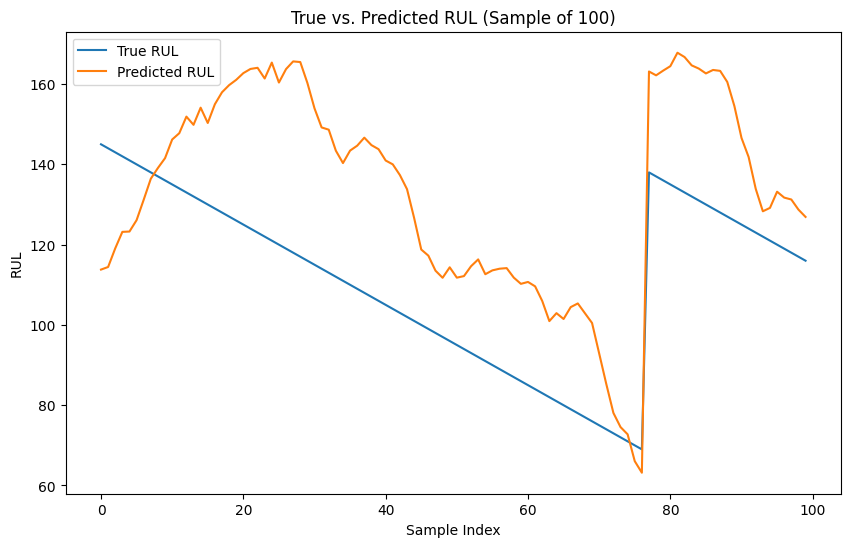

In [13]:
# Predict on test data
y_pred_nasa = model.predict(X_test_nasa)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_nasa, y_pred_nasa))
print("Test RMSE: {:.2f}".format(rmse))

# Plot true vs. predicted RUL for a sample of data
plt.figure(figsize=(10,6))
plt.plot(y_test_nasa[:100], label='True RUL')
plt.plot(y_pred_nasa[:100], label='Predicted RUL')
plt.legend()
plt.title('True vs. Predicted RUL (Sample of 100)')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


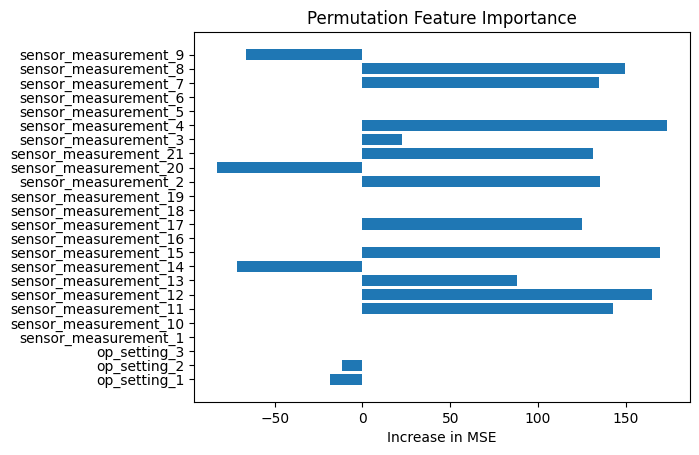

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

def permutation_feature_importance(model, X, y, metric=mean_squared_error):
    baseline = metric(y, model.predict(X))
    importances = []
    for i in range(X.shape[2]):  # Iterate over features
        X_permuted = X.copy()
        X_permuted[:, :, i] = np.random.permutation(X_permuted[:, :, i].flatten()).reshape(X_permuted[:, :, i].shape)
        m = metric(y, model.predict(X_permuted))
        importances.append(m - baseline)
    return importances

# Use a subset of the test data
X_sample = X_test_nasa[:100]  # Adjust the number of samples as needed
y_sample = y_test_nasa[:100]

# Compute importances
importances = permutation_feature_importance(model, X_sample, y_sample)

# Plot the importances
import matplotlib.pyplot as plt

feature_names = features_nasa  # Ensure this matches the feature order
plt.barh(feature_names, importances)
plt.xlabel('Increase in MSE')
plt.title('Permutation Feature Importance')
plt.show()


#Explanation Methods
##Implementing LIME for Model Interpretability

In [16]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cfb03bf5af3d1091eccb495d6cc36832f1fc58652aa3d8935f3060fe45eea4f9
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [17]:
# Import necessary libraries
from lime import lime_tabular
import numpy as np
import pandas as pd


In [18]:
# Flatten the sequences for LIME
X_train_flat = X_train_nasa.reshape((X_train_nasa.shape[0], -1))
X_test_flat = X_test_nasa.reshape((X_test_nasa.shape[0], -1))

# Combine the training and test data for LIME's training set
X_lime = np.vstack((X_train_flat, X_test_flat))

# Prepare feature names for LIME
# Each time step and feature combination will have a unique name
feature_names = []
for t in range(X_train_nasa.shape[1]):
    for f in features_nasa:
        feature_names.append(f"{f}_t{t}")


In [19]:
# Initialize the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_lime,
    feature_names=feature_names,
    class_names=['RUL'],
    mode='regression'
)


In [20]:
# Select an instance from the test set
instance_index = 0  # Change as needed
instance = X_test_flat[instance_index]
true_rul = y_test_nasa[instance_index]

# Define a prediction function for LIME
def predict_function(x):
    x_reshaped = x.reshape((-1, X_train_nasa.shape[1], X_train_nasa.shape[2]))
    return model.predict(x_reshaped)

# Generate explanation
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=predict_function,
    num_features=10  # Number of features to include in the explanation
)

# Display the explanation
exp.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


##Data Visualization Techniques
###Time-Series Plots

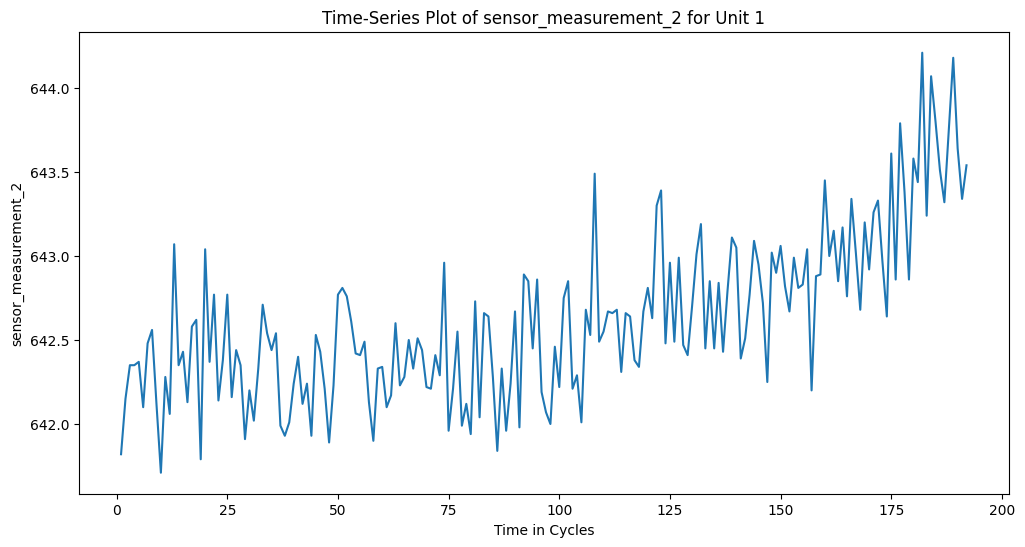

In [21]:
# Plot sensor readings over time for a specific unit
unit_number = 1  # Change as needed
sensor_to_plot = 'sensor_measurement_2'  # Change as needed

# Extract data for the selected unit
unit_data = df_nasa_train[df_nasa_train['unit_number'] == unit_number]

plt.figure(figsize=(12, 6))
plt.plot(unit_data['time_in_cycles'], unit_data[sensor_to_plot])
plt.title(f'Time-Series Plot of {sensor_to_plot} for Unit {unit_number}')
plt.xlabel('Time in Cycles')
plt.ylabel(sensor_to_plot)
plt.show()


###Correlation Heatmaps

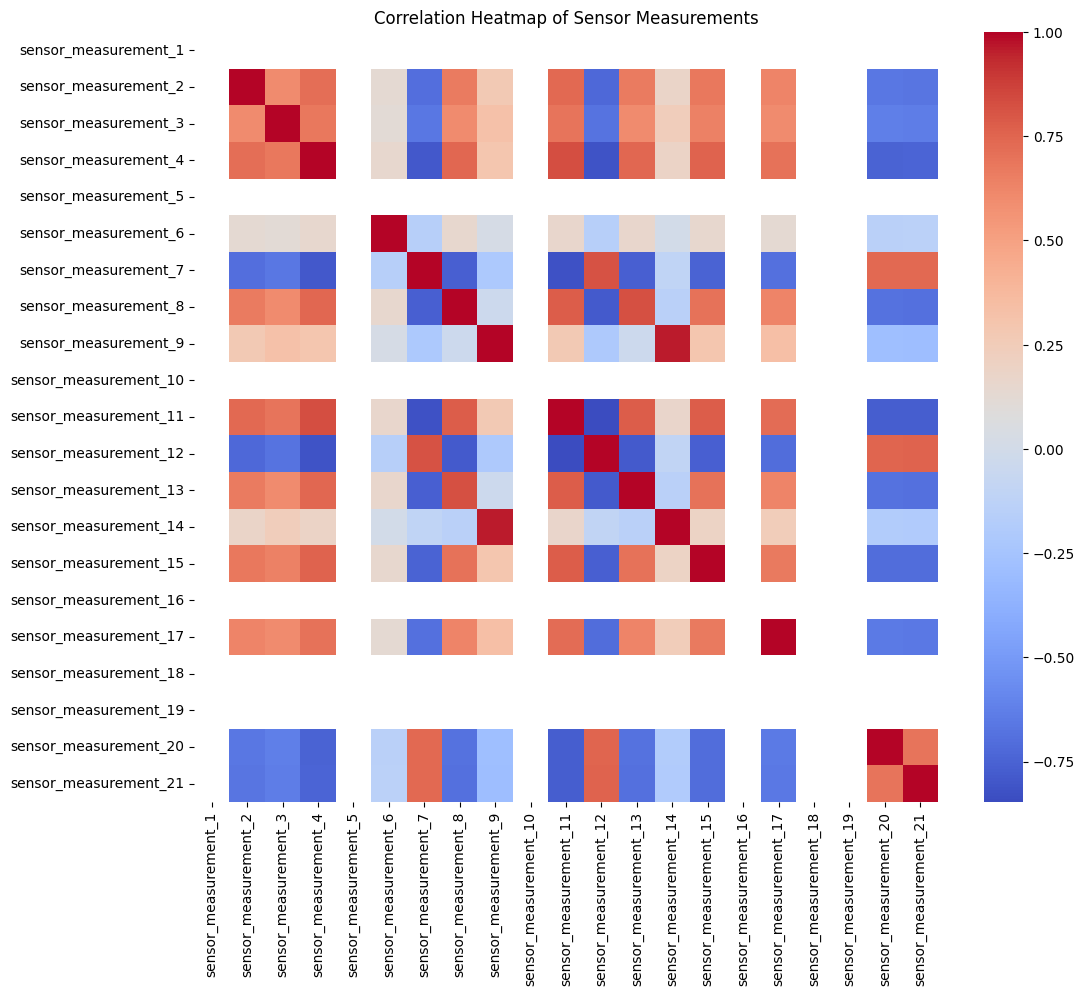

In [22]:
import seaborn as sns

# Compute correlation matrix for sensor measurements
sensor_columns = [col for col in df_nasa_train.columns if 'sensor_measurement' in col]
corr_matrix = df_nasa_train[sensor_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Sensor Measurements')
plt.show()


###Anomaly Detection Visuals

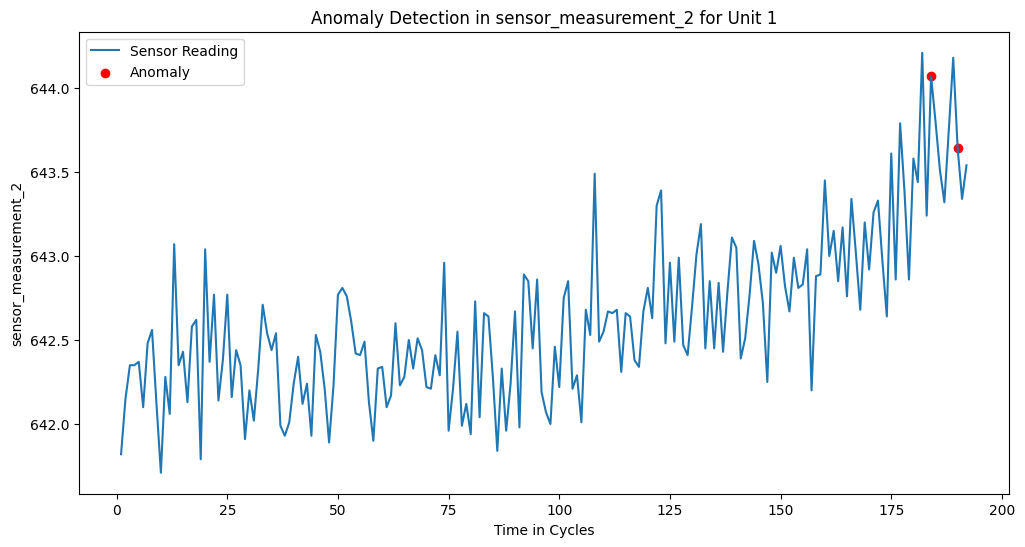

In [23]:
from sklearn.ensemble import IsolationForest

# Select features for anomaly detection
features_for_anomaly = sensor_columns

# Fit the model
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = isolation_forest.fit_predict(df_nasa_train[features_for_anomaly])

# Add anomalies to the DataFrame
df_nasa_train['anomaly'] = anomalies

# Visualize anomalies over time for a specific unit
unit_data = df_nasa_train[df_nasa_train['unit_number'] == unit_number]

plt.figure(figsize=(12, 6))
plt.plot(unit_data['time_in_cycles'], unit_data[sensor_to_plot], label='Sensor Reading')
anomaly_points = unit_data[unit_data['anomaly'] == -1]
plt.scatter(anomaly_points['time_in_cycles'], anomaly_points[sensor_to_plot], color='red', label='Anomaly')
plt.title(f'Anomaly Detection in {sensor_to_plot} for Unit {unit_number}')
plt.xlabel('Time in Cycles')
plt.ylabel(sensor_to_plot)
plt.legend()
plt.show()


#Causal Inference
##Granger Causality Tests

In [24]:
from statsmodels.tsa.stattools import grangercausalitytests

# Prepare data
maxlag = 10  # Maximum number of lags to test
sensor_x = 'sensor_measurement_2'  # Predictor variable
sensor_y = 'sensor_measurement_3'  # Target variable

# Extract data for Granger causality test
unit_data = df_nasa_train[df_nasa_train['unit_number'] == unit_number]
data = unit_data[[sensor_y, sensor_x]].dropna()

# Perform Granger causality test
test_result = grangercausalitytests(data[[sensor_y, sensor_x]], maxlag=maxlag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=24.1323 , p=0.0000  , df_denom=188, df_num=1
ssr based chi2 test:   chi2=24.5173 , p=0.0000  , df=1
likelihood ratio test: chi2=23.0667 , p=0.0000  , df=1
parameter F test:         F=24.1323 , p=0.0000  , df_denom=188, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.0732 , p=0.0000  , df_denom=185, df_num=2
ssr based chi2 test:   chi2=28.9071 , p=0.0000  , df=2
likelihood ratio test: chi2=26.9085 , p=0.0000  , df=2
parameter F test:         F=14.0732 , p=0.0000  , df_denom=185, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.6754  , p=0.0000  , df_denom=182, df_num=3
ssr based chi2 test:   chi2=27.0272 , p=0.0000  , df=3
likelihood ratio test: chi2=25.2613 , p=0.0000  , df=3
parameter F test:         F=8.6754  , p=0.0000  , df_denom=182, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.1005  , p=0.0006  

##Vector AutoRegression (VAR)

In [25]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Prepare data for VAR
unit_data = df_nasa_train[df_nasa_train['unit_number'] == unit_number]
variables = ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4']  # Select sensors
data = unit_data[variables].dropna()

# Fit the VAR model
model = VAR(data)
results = model.fit(maxlags=15, ic='aic')

# Print summary
print(results.summary())

# Forecasting
lag_order = results.k_ar
forecast_input = data.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=5)
forecast_df = pd.DataFrame(forecast, index=range(1, 6), columns=variables)

print("Forecasted Values:")
print(forecast_df)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Dec, 2024
Time:                     03:52:04
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    4.09464
Nobs:                     189.000    HQIC:                   3.78854
Log likelihood:          -1112.86    FPE:                    35.8870
AIC:                      3.58008    Det(Omega_mle):         30.7442
--------------------------------------------------------------------
Results for equation sensor_measurement_2
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                         477.999796        65.384285            7.311           0.000
L1.sensor_measurement_2         0.030179         0.075015            0.402           0.687
L1.se

##Transfer Entropy

In [26]:
# Install jpype and its dependencies
!pip install jpype1 pyinform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 9.9 MB/s eta 0:00:00


In [27]:
import pyinform

# Prepare data
sensor_x_data = unit_data[sensor_x].values.astype(float)
sensor_y_data = unit_data[sensor_y].values.astype(float)

# Discretize the data if necessary
def discretize(series, bins=10):
    return pd.qcut(series, q=bins, labels=False, duplicates='drop')

sensor_x_discrete = discretize(sensor_x_data)
sensor_y_discrete = discretize(sensor_y_data)

# Compute transfer entropy from X to Y
te_xy = pyinform.transfer_entropy(sensor_x_discrete, sensor_y_discrete, k=1)

# Compute transfer entropy from Y to X
te_yx = pyinform.transfer_entropy(sensor_y_discrete, sensor_x_discrete, k=1)

print(f"Transfer Entropy from {sensor_x} to {sensor_y}: {te_xy}")
print(f"Transfer Entropy from {sensor_y} to {sensor_x}: {te_yx}")


Transfer Entropy from sensor_measurement_2 to sensor_measurement_3: 1.6848201195386108
Transfer Entropy from sensor_measurement_3 to sensor_measurement_2: 1.6269922163170094


#Optimization
##Hyperparameter Tuning
###Bayesian Optimization

In [28]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.6 MB/s eta 0:00:00


In [30]:
import keras_tuner as kt
from tensorflow.keras.layers import Dropout


# Define a function to build the model for Keras Tuner
def build_model(hp):
    model = Sequential()
    units = hp.Int('units', min_value=32, max_value=128, step=16)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    model.add(LSTM(units=units, input_shape=(X_train_nasa.shape[1], X_train_nasa.shape[2])))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1))
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Initialize the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Run the hyperparameter search
tuner.search(
    X_train_nasa, y_train_nasa,
    epochs=20,
    validation_split=0.2
)

# Get the best model and parameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Optimizer: {best_hps.get('optimizer')}")


Trial 5 Complete [00h 13m 06s]
val_loss: 996.0610961914062

Best val_loss So Far: 970.3939208984375
Total elapsed time: 00h 39m 03s
Best hyperparameters:
Units: 64
Dropout Rate: 0.4
Optimizer: rmsprop
